# Importing the libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [32]:
dataset = pd.read_csv(r"C:\Users\Admin\Downloads\SampleSuperstore.csv")
dataset.head()  #head() displays only the first 5              

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [34]:
dataset.describe() #looking at the data from statistical point of view

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [35]:
import pandas_profiling as pf

In [36]:
pf.ProfileReport(dataset)

In [37]:
plt.style.use('dark_background')


In [38]:
dataset = dataset.drop(['Postal Code'],axis=1)

In [39]:
dataset['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

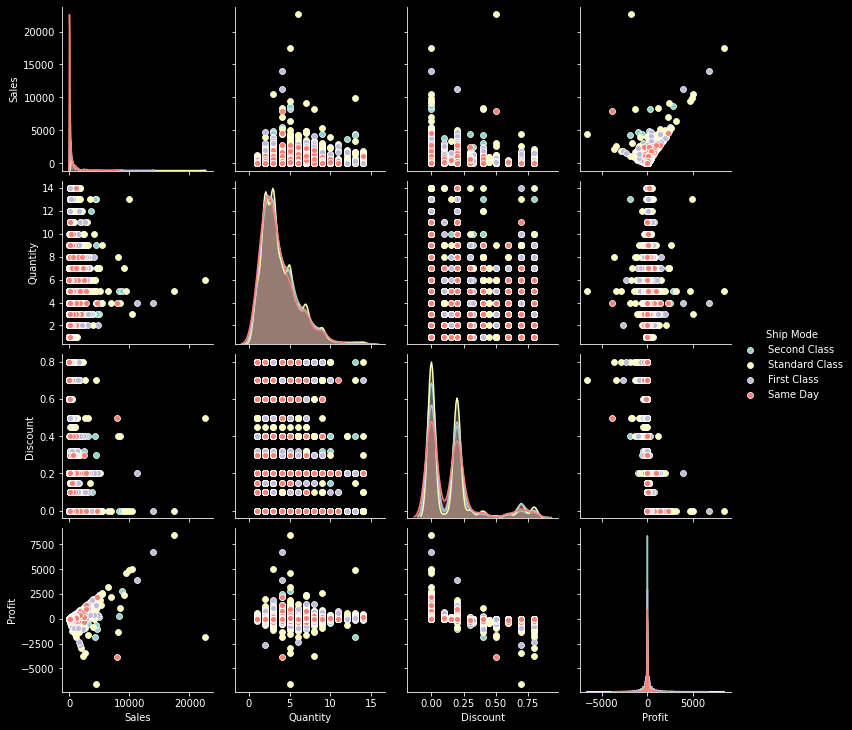

In [40]:
sns.pairplot(dataset,hue='Ship Mode')

In [42]:
dataset['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

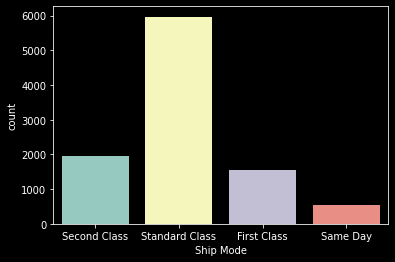

In [44]:
sns.countplot(x=dataset['Ship Mode'])

In [45]:
dataset['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

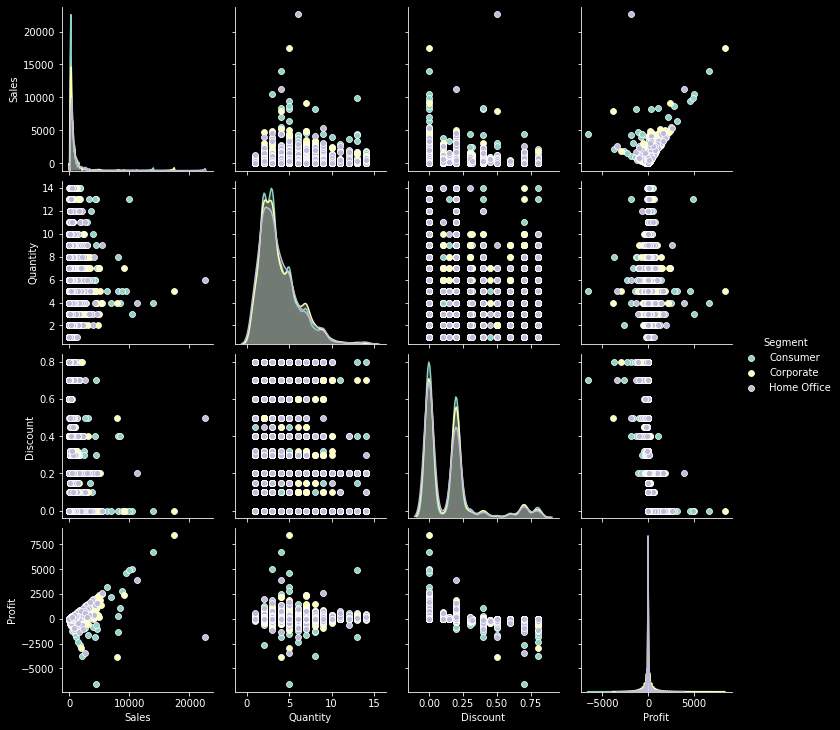

In [47]:
sns.pairplot(dataset,hue='Segment') #plotting pairplot

<AxesSubplot:xlabel='Segment', ylabel='count'>

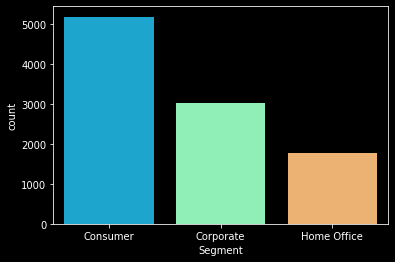

In [51]:
sns.countplot(x='Segment',data=dataset,palette='rainbow')

In [52]:
dataset['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

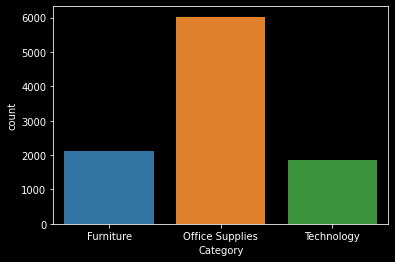

In [53]:
sns.countplot(x='Category',data=dataset,palette='tab10')

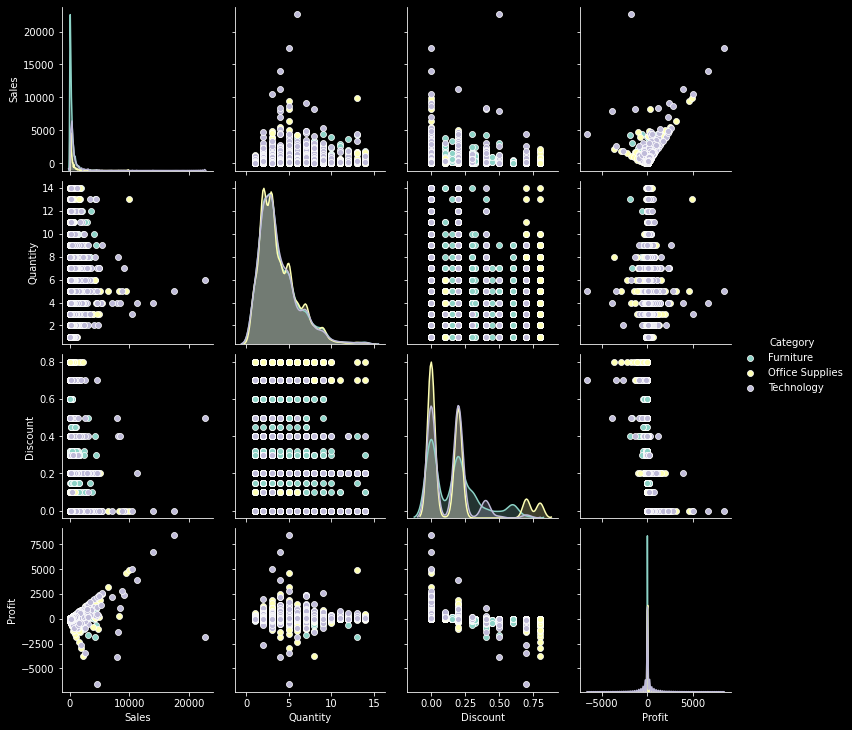

In [54]:
sns.pairplot(dataset,hue='Category')

In [55]:
dataset['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

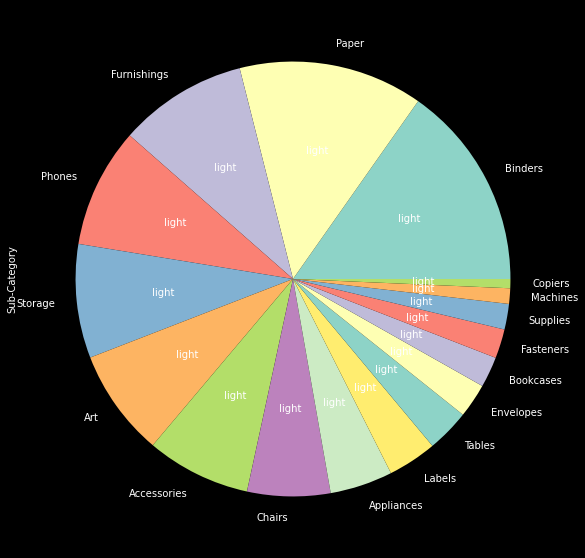

In [56]:
plt.figure(figsize=(12,10))
dataset['Sub-Category'].value_counts().plot.pie(autopct='light')
plt.show()

In [58]:
dataset['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

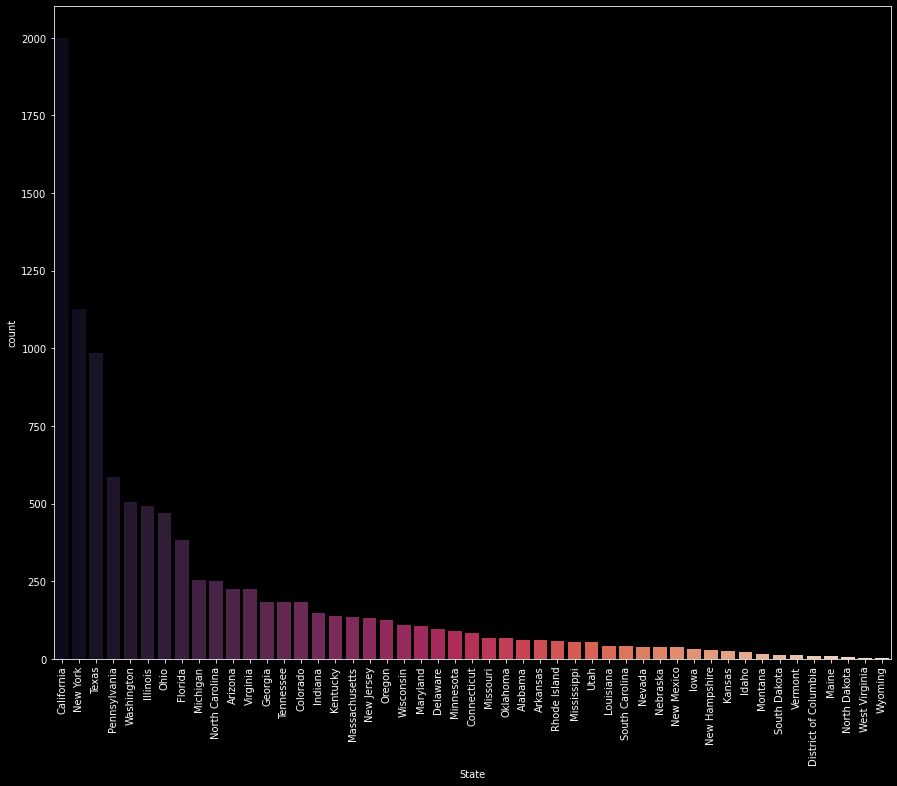

In [60]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=dataset,palette='rocket',order=dataset['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

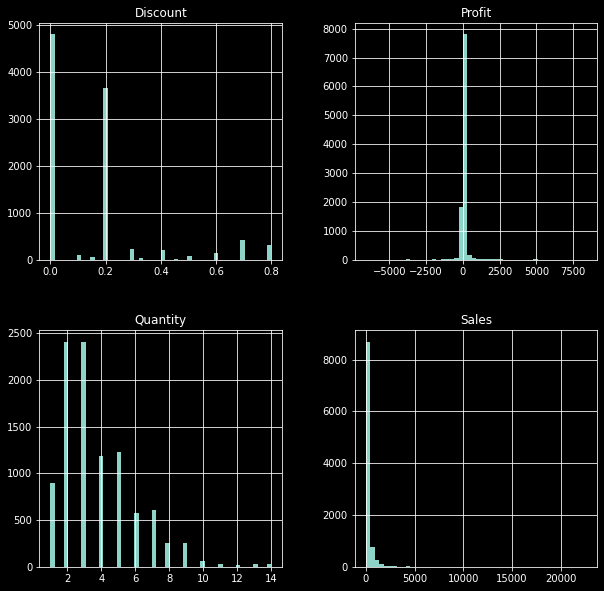

In [61]:
dataset.hist(figsize=(10,10),bins=50)
plt.show()

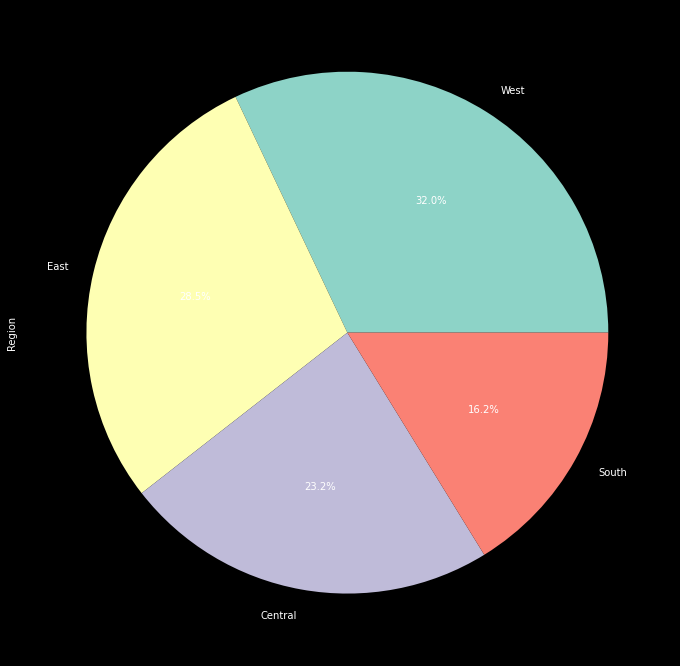

In [62]:
plt.figure(figsize=(15,12))
dataset['Region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

# Profit v/s discount

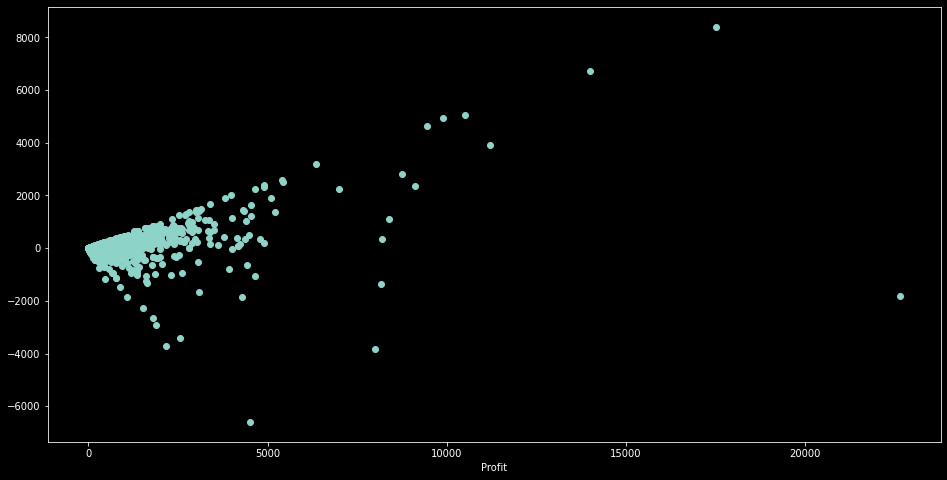

In [64]:
fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(dataset['Sales'],dataset['Profit'])
ax.set_xlabel('Sales')
ax.set_xlabel('Profit')
plt.show()

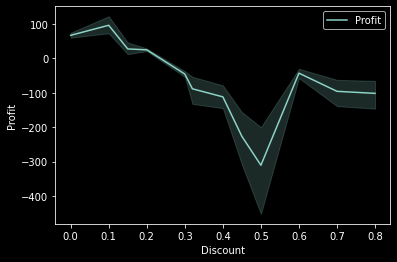

In [65]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=dataset)
plt.legend()
plt.show()

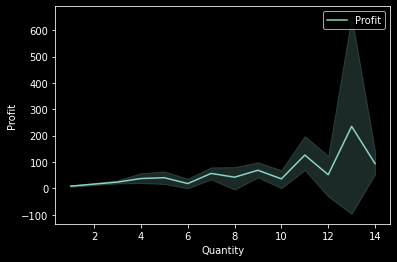

In [66]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=dataset)
plt.legend()
plt.show()

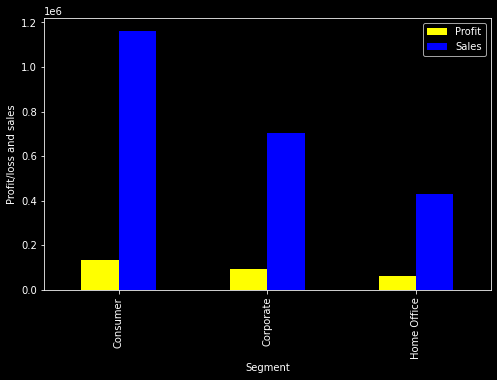

In [67]:
dataset.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['yellow','blue'],figsize=(8,5))
plt.ylabel('Profit/loss and sales')
plt.show()

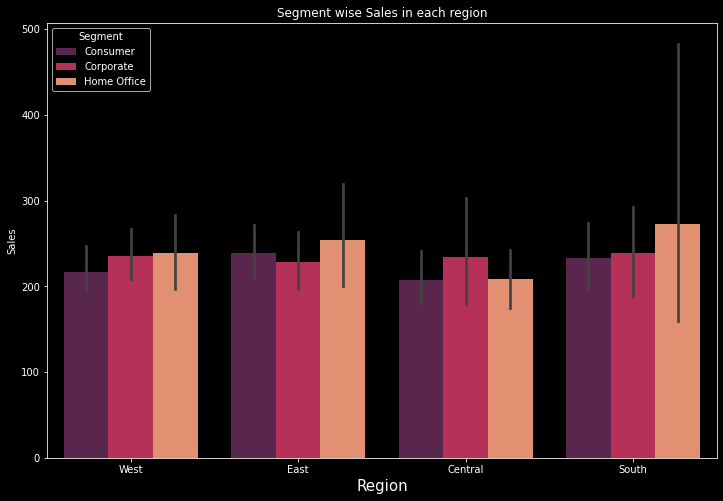

In [68]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each region')
sns.barplot(x='Region',y='Sales',data=dataset,hue='Segment',order=dataset['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

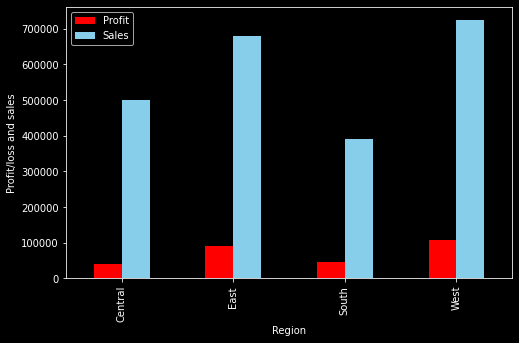

In [69]:
dataset.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['red','skyblue'],figsize=(8,5))
plt.ylabel('Profit/loss and sales')
plt.show()

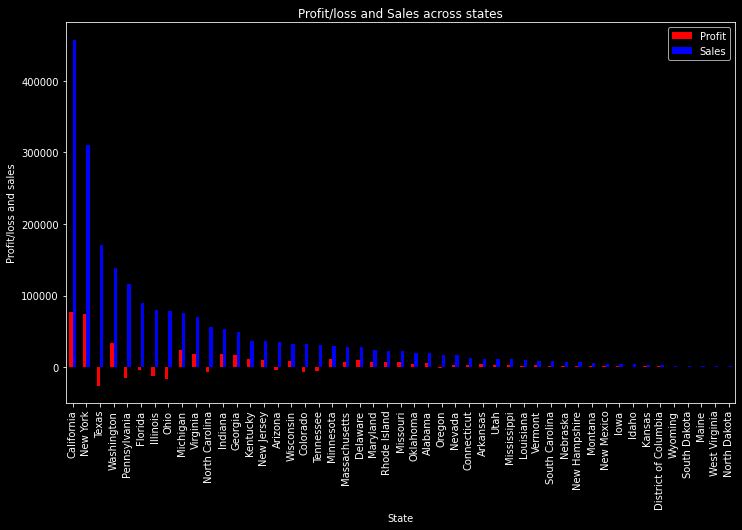

In [70]:
ps = dataset.groupby('State')[['Profit','Sales']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','blue'],figsize=(12,7))
plt.title('Profit/loss and Sales across states')
plt.xlabel('State')
plt.ylabel('Profit/loss and sales')
plt.show()

In [71]:
top_states = dataset['State'].value_counts().nlargest(10)
top_states

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

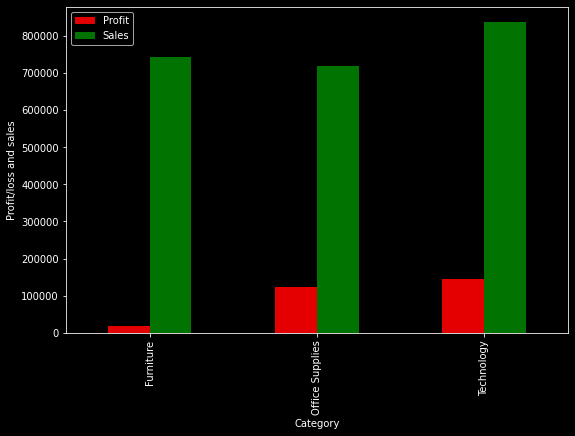

In [72]:
dataset.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['red','green'],alpha=0.9,figsize=(9,6))
plt.ylabel('Profit/loss and sales')
plt.show()

# Observation

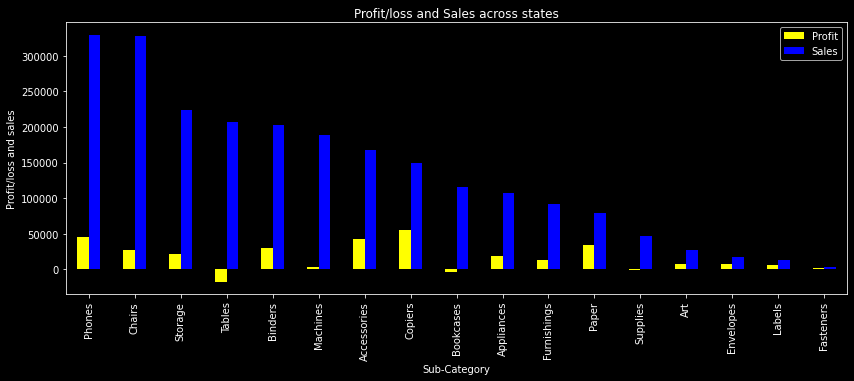

In [74]:
ps = dataset.groupby('Sub-Category')[['Profit','Sales']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['yellow','blue'],figsize=(14,5))
plt.title('Profit/loss and Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss and sales')
plt.show()